<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/%E9%9D%92%E7%A9%BA%E6%96%87%E5%BA%AB%E3%80%8E%E6%B3%95%E7%AA%93%E5%A4%9C%E8%A9%B1%E3%80%8F%E3%81%AE%E3%83%86%E3%82%AD%E3%82%B9%E3%83%88%E3%83%87%E3%83%BC%E3%82%BF%E3%82%92%E5%88%A9%E7%94%A8%E3%81%99%E3%82%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 青空文庫『法窓夜話』のテキストデータを利用する

*  ファイルを読み込む際に文字コードにかんするエラーが発生するため，調査した。

*  穂積陳重著『法窓夜話』
   *  調べてみると，著者の穂積陳重の長男である穂積重遠は，『虎に翼』に登場する穂高先生のモデルであるらしい。陳重の妻は渋沢栄一の長女。
   *  【1】 [青空文庫 図書カード No.1872](https://www.aozora.gr.jp/cards/000301/card1872.html)
      *  1つのテキストデータがある
         *  1872_ruby_3491.zip (2014-07-25)
   *  【2】 [GitHub aozorabunko/aozorabunko cards/000301/files](https://github.com/aozorabunko/aozorabunko/tree/master/cards/000301/files)
      *  2つのテキストデータがある
         *  1872_ruby.zip (2011-05-02)
         *  1872_ruby_3491.zip (2014-07-26)
   *  【3】 [GitHub aozorahack/aozorabunko_text cards/000301/files](https://github.com/aozorahack/aozorabunko_text/tree/master/cards/000301/files)
      *  こちらにも2つのテキストデータがある
         *  1872_ruby.txt (2019-02-11)
         *  1872_ruby_3491.txt (2019-02-11)

## テキストデータは2種類

In [ ]:
!curl -sRL https://www.aozora.gr.jp/cards/000301/files/1872_ruby_3491.zip -o hoso_yawa_1.zip && unzip -oq hoso_yawa_1.zip && mv 02hoso_yawa.txt hoso_yawa_1.txt
!curl -sRL https://github.com/aozorabunko/aozorabunko/raw/master/cards/000301/files/1872_ruby.zip -o hoso_yawa_2a.zip && unzip -oq hoso_yawa_2a.zip && mv housouyawa.txt hoso_yawa_2a.txt
!curl -sRL https://github.com/aozorabunko/aozorabunko/raw/master/cards/000301/files/1872_ruby_3491.zip -o hoso_yawa_2b.zip && unzip -oq hoso_yawa_2b.zip && mv 02hoso_yawa.txt hoso_yawa_2b.txt
!curl -sRL https://github.com/aozorahack/aozorabunko_text/raw/master/cards/000301/files/1872_ruby/1872_ruby.txt -o hoso_yawa_3a.txt
!curl -sRL https://github.com/aozorahack/aozorabunko_text/raw/master/cards/000301/files/1872_ruby_3491/1872_ruby_3491.txt -o hoso_yawa_3b.txt
!sha256sum hoso_yawa_*.txt

763e8b97e576be550674641db0a1c8c74091613d83a360fc6960f7e6e0257d9a  hoso_yawa_1.txt
49ec7361ee5ce0a7f175090107444236934ff92dec55ff9f3109f39580fc8523  hoso_yawa_2a.txt
763e8b97e576be550674641db0a1c8c74091613d83a360fc6960f7e6e0257d9a  hoso_yawa_2b.txt
49ec7361ee5ce0a7f175090107444236934ff92dec55ff9f3109f39580fc8523  hoso_yawa_3a.txt
763e8b97e576be550674641db0a1c8c74091613d83a360fc6960f7e6e0257d9a  hoso_yawa_3b.txt


In [ ]:
!mv hoso_yawa_3a.txt 1872_ruby.txt
!mv hoso_yawa_3b.txt 1872_ruby_3491.txt
!rm hoso_yawa_*.zip hoso_yawa_*.txt

## エラーが発生するのは２つのテキストファイルのうち 1872_ruby のみ（_3491 が付かない方）

In [ ]:
!iconv -f cp932 -t utf8 1872_ruby.txt | sha256sum

iconv: illegal input sequence at position 121589
125e3301831e4546bac840125cf790c0ef39996819ac17c805c95c4e93c45d8d  -


In [ ]:
!iconv -f cp932 -t utf8 1872_ruby_3491.txt | sha256sum

46d5b1a67e1c53cd3955e3aedc81d6e4299f7e238726291ae813e8f3858e8d64  -


## エラーが発生する章は「四七　大木司法卿の造語造字案」

In [ ]:
# エラーが発生する文字の直前までを表示する（最後の１行のみ）
!head -c 121589 1872_ruby.txt | iconv -f cp932 -t utf8 | tail -n 1

一、新字ノ頭ニ、※［＃「※」は「□冠」、168-4］アル者ハ、亜《ア》頭ノ語ナリ、他ノエ、イ、※［＃「※」は「□偏」、168-4］、ユ、モ埃《エ》伊《イ》阿《オ》兪《ユ》頭ノ語ニシテ、

In [ ]:
# エラーが発生する文字（2バイト）を除けば，それ以降は正常にデコードできる
!tail -c +121592 1872_ruby.txt | iconv -f cp932 -t utf8 | head -n 1

アル者ハ、匐《べ》以下ノ単字頭ト知ルベシ。


In [ ]:
# エラーが発生する文字の前後を確認する
!tail -c +121584 1872_ruby.txt | head -c 14 | od -tx1

0000000 83 56 83 65 81 41 eb 81 83 41 83 8b 8e d2
0000016


In [ ]:
b'\x83\x56\x83\x65\x81\x41'.decode('cp932')

'シテ、'

In [ ]:
b'\x83\x41\x83\x8b\x8e\xd2'.decode('cp932')

'アル者'

*  エラーが発生した文字は `eb 81` である。

## エラーが発生しない方のテキストを確認する

*  該当箇所は `※［＃「縦長の＝」、168-5］` となっている。

In [ ]:
# エラーが発生する文字の直前までを表示する（最後の１行のみ）
!head -c 128074 1872_ruby_3491.txt | iconv -f cp932 -t utf8 | tail -n 1

一、新字ノ頭ニ、※［＃「横長の口」、168-4］アル者ハ、亜《ア》頭ノ語ナリ、他ノエ、イ、※［＃「縦長の口」、168-4］、ユ、モ埃《エ》伊《イ》阿《オ》兪《ユ》頭ノ語ニシテ、※［＃「縦長の＝」、168-5］アル者ハ、匐《べ》以下ノ単字頭ト知ルベシ。


*  青空文庫の [XHTML 版](https://www.aozora.gr.jp/cards/000301/files/1872_53638.html)でも該当箇所を確認することができる。

## 書籍の影印を確認する

*  本文の該当箇所の画像は，国立国会図書館デジタルコレクションにて確認できる。
   *  https://dl.ndl.go.jp/pid/936012/1/104
      *  同じ資料を [次世代デジタルライブラリ―](https://lab.ndl.go.jp/dl/book/936012?page=104) でも確認できる（全文検索機能付き！）
   *  青空文庫のテキストの底本（岩波文庫）とは異なる点に注意が必要。

*  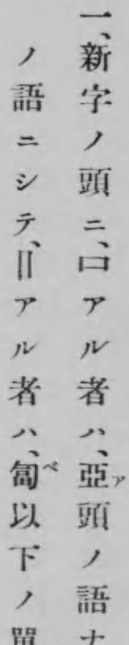

*  この影印（底本とは異なるが）を確認し，かつ，後に続く文章を少し読んだ限りにおいては，これは「＝」を縦書きにしたもの，というよりは「口」偏ではないか，と考えられる。
   * 横棒が細いために「口」が「||」に見えただけ，という可能性がある。